In [6]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader
#from torchvision import transforms
import itertools
import torch.nn.functional as F
# import cv2
import glob
import natsort

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
class DataLoaderSegmentation(Dataset):
    def __init__(self, path):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = glob.glob(os.path.join(path,'input_image','*.jpg')) 
        self.mask_files = glob.glob(os.path.join(path,'hair_mask','*.png')) 
        
        self.img_files = natsort.natsorted(self.img_files)
        self.mask_files = natsort.natsorted(self.mask_files)

    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        mask_path = self.mask_files[idx]
        
        
        img = mpimg.imread(img_path)/255
        img = torch.from_numpy(img).float()
        
        mask = mpimg.imread(mask_path)
        mask = torch.from_numpy(mask).float()
        
        '''
        img = np.asarray(Image.open(img_path))
        img = torch.from_numpy(img).float()
        
        mask = np.asarray(Image.open(mask_path))
        mask = torch.from_numpy(mask).float()
        '''
        
        return img, mask
    
    def __len__(self):
        return len(self.img_files)

In [8]:
# Visualize some data
# Load data
dataset = DataLoaderSegmentation("dataset_2")

In [15]:
print(dataset[0][1].shape)

torch.Size([512, 512, 3])


In [23]:
print(dataset[1][1])

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


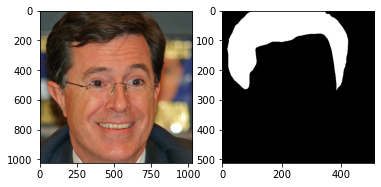

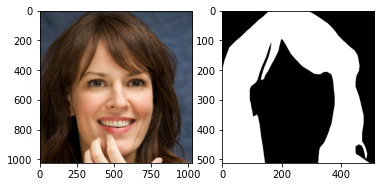

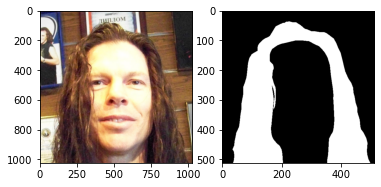

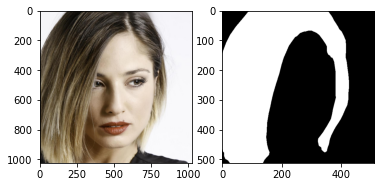

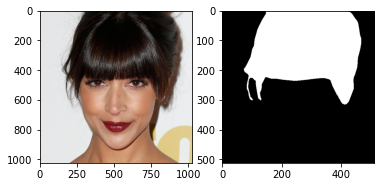

In [9]:
for i in range(5):
    example_img = dataset[i][0]
    example_mask = dataset[i][1]
    
    f, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(example_img)
    ax2.imshow(example_mask)